In [1]:
import meep as mp
from meep import mpb
import numpy as np
from matplotlib import pyplot as plt

Using MPI version 3.1, 1 processes


In [2]:
Si3N4   = mp.Medium(index= 2.0106)
SiO2 = mp.Medium(index=1.4570)
H2O =  mp.Medium(index=1.333)

In [3]:
wavelength = 0.632
omega      = 1/wavelength

In [4]:
resolution = 30  # pixels/um

In [12]:
w = 0.150    # Si3N4 wire width (um)
h = 0.200  #.10 -> .30 # Si3N4 wire height (um)
s = 0.05 #  slot width sweep from .050 -> .1

sc_x = 2
sc_y = 8 # supercell width (um)
sc_z = 0  # supercell height (um)

cell = mp.Vector3(sc_x,sc_y,sc_z)

wg_l = sc_y;
shift = 1.0;

gap = 0.1


geometry = [#mp.Block(size=mp.Vector3(w, wg_l, mp.inf), center=mp.Vector3(0.5*(s+w),shift), material=Si3N4),            
           # mp.Block(size=mp.Vector3(w, wg_l , mp.inf), center=mp.Vector3(-0.5*(s+w),shift), material=Si3N4),
            mp.Block(size=mp.Vector3(w, wg_l , mp.inf), center=mp.Vector3(+0.5*(gap+w) ,shift), material=Si3N4),
            mp.Block(size=mp.Vector3(w, wg_l , mp.inf), center=mp.Vector3(-0.5*(gap+w),0), material=Si3N4),
           # mp.Block(size=mp.Vector3(w, mp.inf, mp.inf), center=mp.Vector3(-0.5*(gap+w)-s- w  ,0), material=Si3N4),
            #mp.Block(size=mp.Vector3(w, wg_l , mp.inf), center=mp.Vector3(0.5*(gap+w)+ w +s,shift), material=Si3N4)
        
           ]



In [13]:
pml_l = 0.5
pml_layers = [mp.PML(pml_l)]

In [19]:
kpoint = mp.Vector3(0,1)
bnum = 1
comp = mp.Ez

sources = [mp.EigenModeSource(src=mp.ContinuousSource(omega),
                                  center=mp.Vector3(-0.5*(2*w+gap),-sc_y/2 + pml_l),
                                  size=mp.Vector3(x= 3*(w+ s)),
                                  direction=mp.NO_DIRECTION,
                                  eig_kpoint=kpoint,
                                  eig_band=bnum,
                                  eig_parity=mp.NO_PARITY,
                                  eig_match_freq=True)]

In [20]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material = H2O)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00070138 s
Working in 2D dimensions.
Computational cell is 2 x 8 x 0 with resolution 30
     block, center = (0.125,1,0)
          size (0.15,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4.04251,4.04251,4.04251)
     block, center = (-0.125,0,0)
          size (0.15,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4.04251,4.04251,4.04251)
time for set_epsilon = 0.0771888 s
-----------
MPB solved for frequency_1(0,1,0) = 0.643745 after 13 iters
MPB solved for frequency_1(0,2.51466,0) = 1.49564 after 8 iters
MPB solved for frequency_1(0,2.68243,0) = 1.5818 after 7 iters
MPB solved for frequency_1(0,2.68337,0) = 1.58228 after 4 iters
MPB solved for frequency_1(0,2.68337,0) = 1.58228 after 1 iters


<AxesSubplot:xlabel='X', ylabel='Y'>

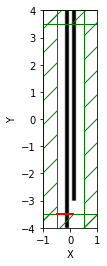

In [21]:
sim.plot2D()

In [22]:
sim.run(until=100)

FloatProgress(value=0.0, description='0% done ')

run 0 finished at t = 100.0 (6000 timesteps)


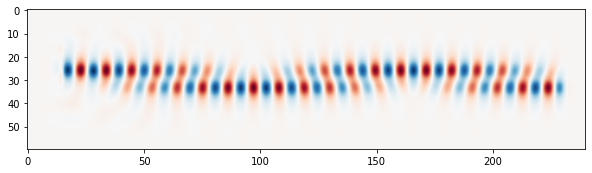

In [23]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=comp)
plt.figure(figsize=(10,3))
#plt.imshow(eps_data, interpolation='spline36', cmap='binary')
plt.imshow(ez_data, interpolation='spline36', cmap='RdBu', alpha=0.99)
#plt.axis('off')
plt.show()